# Mnist

In [1]:
# Step 1:Load the Data
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
x_train.shape

(60000, 28, 28)

In [0]:
# Normalization
x_train = x_train/255
x_test = x_test/255

In [0]:
# X_train[0]

In [0]:
import numpy as np
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [5]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
# Step 2: Build the Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, 3, activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                100416    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)               

In [0]:
# Step 3 Compile the Model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
# Step 4 Train
history = model.fit(x_train,y_train,
                    epochs=10, 
                    validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3183 - accuracy: 0.9002 - val_loss: 0.0573 - val_accuracy: 0.9815
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1323 - accuracy: 0.9609 - val_loss: 0.0401 - val_accuracy: 0.9877
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0974 - accuracy: 0.9711 - val_loss: 0.0373 - val_accuracy: 0.9879
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0812 - accuracy: 0.9755 - val_loss: 0.0304 - val_accuracy: 0.9902
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0687 - accuracy: 0.9796 - val_loss: 0.0344 - val_accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0607 - accuracy: 0.9816 - val_loss: 0.0301 - val_accuracy: 0.9900
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0569 - accuracy: 0.9825 - val_loss: 0.0251 - val_accuracy:

In [0]:
# Step 5 Evaluation
loss, acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0287 - accuracy: 0.9911


In [0]:
loss, acc

(0.028681788593530655, 0.991100013256073)

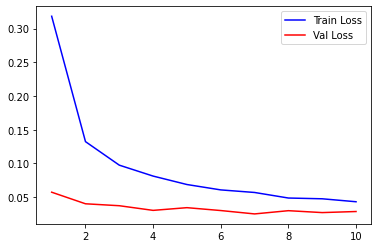

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs, loss,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Val Loss')
plt.legend()
plt.show()

# Ex: CNN on CIFAR10

In [0]:
# Step 1 Preprocess data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
x_train = x_train / 255
x_test = x_test / 255

In [0]:
# x_train[0]

In [0]:
# Step 2: Create the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=(32,32,3)))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

In [0]:
# Step 3: Compile the Model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Step 4: Train the Model
history = model.fit(x_train, y_train, 
          epochs = 5, 
          validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5782 - accuracy: 0.4294 - val_loss: 1.2296 - val_accuracy: 0.5561
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2898 - accuracy: 0.5425 - val_loss: 1.0711 - val_accuracy: 0.6342
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1773 - accuracy: 0.5850 - val_loss: 1.0263 - val_accuracy: 0.6434
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1083 - accuracy: 0.6107 - val_loss: 0.9653 - val_accuracy: 0.6651
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0605 - accuracy: 0.6284 - val_loss: 0.9098 - val_accuracy: 0.6793


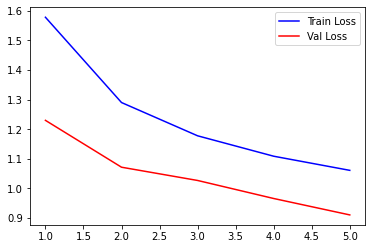

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs, loss,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Val Loss')
plt.legend()
plt.show()

In [0]:
# Step 5: Evaluate the Model
loss,acc = model.evaluate(x_test, y_test)
loss,acc

313/313 [==============================] - 1s 3ms/step - loss: 0.9098 - accuracy: 0.6793


(0.909835696220398, 0.6793000102043152)

In [0]:
# Step 6: Save the Model
model.save("cifar_cnn.h5")

# Case Study: Dogs & Cats

## CNN on Small Dataset: Cats and Dogs

### Import the data

In [6]:
import keras
URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = keras.utils.get_file('cats_and_dogs_filtered.zip', origin=URL, extract=True)

Using TensorFlow backend.


68608000/68606236 [==============================] - 1s 0us/step


In [7]:
path_to_zip

'/root/.keras/datasets/cats_and_dogs_filtered.zip'

In [0]:
PATH = path_to_zip.replace('.zip', '')

In [9]:
PATH

'/root/.keras/datasets/cats_and_dogs_filtered'

In [0]:
# /cats_and_dogs_filtered
#   /train
#     /cats (-->y_train)
#       1.jpg
#       2.jpg

#     /dogs (-->y_train)
#       1.jpg
#       2.jpg

#   /validaton
#     /cats
#       1.jpg
#       2.jpg

#     /dogs
#       1.jpg
#       2.jpg

In [0]:
train_dir = PATH + '/train'
validation_dir = PATH + '/validation'

In [11]:
train_dir

'/root/.keras/datasets/cats_and_dogs_filtered/train'

### Image Generator

In [0]:
def generate_even():
  for i in range(10):
    yield i*2

In [0]:
g = generate_even()

In [16]:
next(g)

4

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_image_generator = ImageDataGenerator(rescale=1/255) 
val_image_generator = ImageDataGenerator(rescale=1/255) 

In [18]:
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 128

train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = val_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
train_data_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [0]:
train_data_gen.class_indices

{'cats': 0, 'dogs': 1}

### Visualize the raw images 

In [0]:
batch_images, batch_labels = next(train_data_gen)

In [0]:
batch_labels

array([1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [0]:
batch_images.shape

(128, 150, 150, 3)

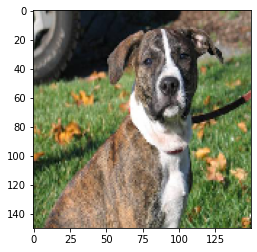

In [0]:
import matplotlib.pyplot as plt
plt.imshow(batch_images[0])

### Build the Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape = (IMG_HEIGHT, IMG_WIDTH,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

### Train the Model

In [22]:
history = model.fit(
    train_data_gen,
    steps_per_epoch = 2000//BATCH_SIZE,
    epochs=15,
    validation_data=val_data_gen,
    validation_steps = 1000//BATCH_SIZE,
)

Epoch 1/15
15/15 [==============================] - 9s 598ms/step - loss: 0.9007 - accuracy: 0.5057 - val_loss: 0.6908 - val_accuracy: 0.5000
Epoch 2/15
15/15 [==============================] - 9s 574ms/step - loss: 0.6884 - accuracy: 0.5262 - val_loss: 0.6764 - val_accuracy: 0.5640
Epoch 3/15
15/15 [==============================] - 9s 580ms/step - loss: 0.6728 - accuracy: 0.5662 - val_loss: 0.6564 - val_accuracy: 0.5500
Epoch 4/15
15/15 [==============================] - 9s 577ms/step - loss: 0.6282 - accuracy: 0.6554 - val_loss: 0.6178 - val_accuracy: 0.6640
Epoch 5/15
15/15 [==============================] - 9s 587ms/step - loss: 0.5742 - accuracy: 0.6982 - val_loss: 0.5866 - val_accuracy: 0.6930
Epoch 6/15
15/15 [==============================] - 9s 592ms/step - loss: 0.5399 - accuracy: 0.7329 - val_loss: 0.6107 - val_accuracy: 0.6960
Epoch 7/15
15/15 [==============================] - 9s 585ms/step - loss: 0.5107 - accuracy: 0.7516 - val_loss: 0.5543 - val_accuracy: 0.7200
Epoch 

### Evaluate the Model

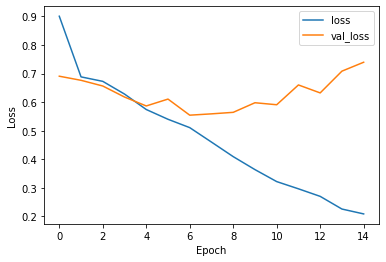

In [23]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Data Augmentation

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

#### Flipping

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rescale=1/255, 
                               horizontal_flip=True)

In [0]:
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


In [0]:
augmented_images= [train_data_gen[0][0][0] for i in range(5)]

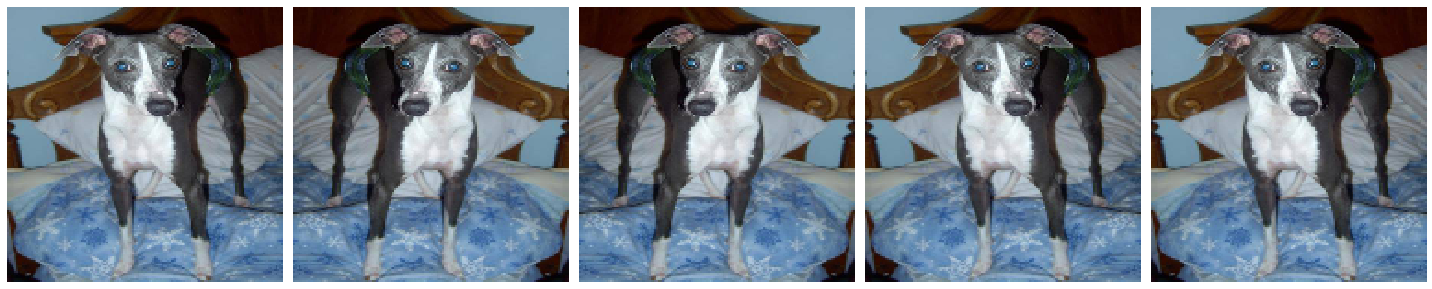

In [0]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images[:5])

#### Rotation

In [0]:
image_gen = ImageDataGenerator(rescale=1/255, 
                               rotation_range=45)

In [0]:
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


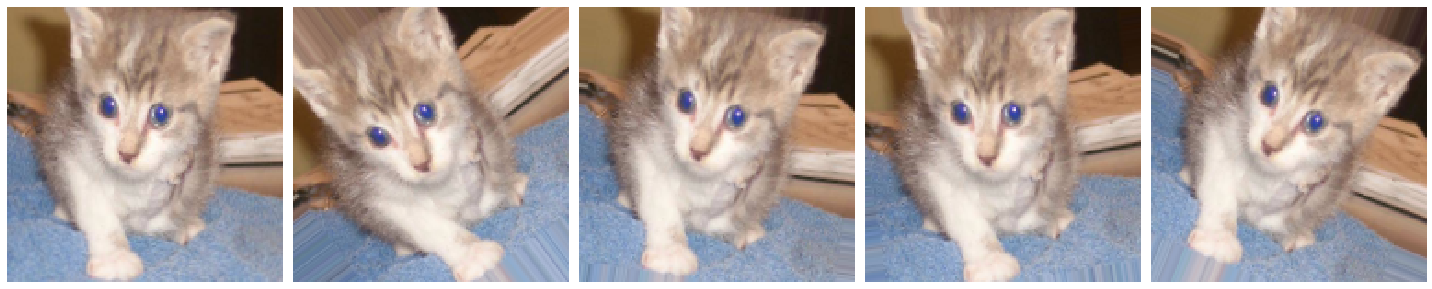

In [0]:
plotImages(augmented_images)

#### Zoom

In [0]:
image_gen = ImageDataGenerator(rescale=1/255, 
                               zoom_range=0.5)

In [0]:
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


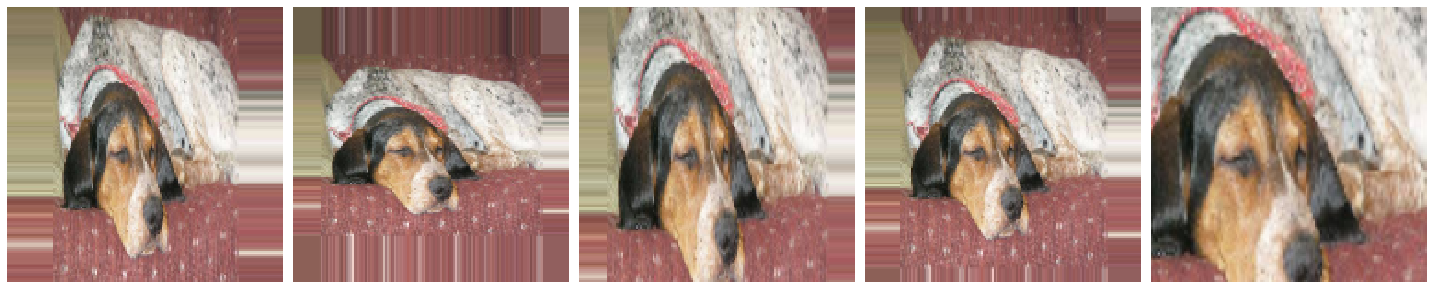

In [0]:
plotImages(augmented_images)

### Applying Data Augumentation

In [0]:
train_image_generator = ImageDataGenerator(
                    rescale=1/255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
validation_image_generator = ImageDataGenerator(rescale=1/255)

In [0]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Build the Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape = (IMG_HEIGHT, IMG_WIDTH,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 18, 18, 64)       

In [0]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Train the Model

In [0]:
history = model.fit(
    train_data_gen,
    steps_per_epoch = 2000//BATCH_SIZE,
    epochs=15,
    validation_data=val_data_gen,
    validation_steps = 1000//BATCH_SIZE,
)

### Evalaute the Model

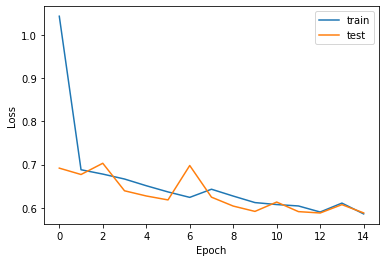

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch, loss, label='train')
plt.plot(epoch, val_loss, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Ex: CNN with Dropout

In [0]:
cifar10 = keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255, x_test / 255

In [0]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, 3, padding='same', activation='relu', input_shape = (32, 32, 3)))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train, 
                    epochs=10,
                    validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 8s 166us/sample - loss: 1.5863 - acc: 0.4212 - val_loss: 1.3376 - val_acc: 0.5477
Epoch 2/10
50000/50000 [==============================] - 8s 157us/sample - loss: 1.2690 - acc: 0.5448 - val_loss: 1.1503 - val_acc: 0.6030
Epoch 3/10
50000/50000 [==============================] - 8s 159us/sample - loss: 1.1476 - acc: 0.5917 - val_loss: 1.0592 - val_acc: 0.6457
Epoch 4/10
50000/50000 [==============================] - 8s 164us/sample - loss: 1.0796 - acc: 0.6141 - val_loss: 0.9875 - val_acc: 0.6613
Epoch 5/10
50000/50000 [==============================] - 8s 160us/sample - loss: 1.0329 - acc: 0.6328 - val_loss: 0.9500 - val_acc: 0.6699
Epoch 6/10
50000/50000 [==============================] - 8s 157us/sample - loss: 0.9956 - acc: 0.6479 - val_loss: 0.9762 - val_acc: 0.6631
Epoch 7/10
50000/50000 [==============================] - 8s 161us/sample - loss: 0.9580 - acc: 0.6605 - val_l

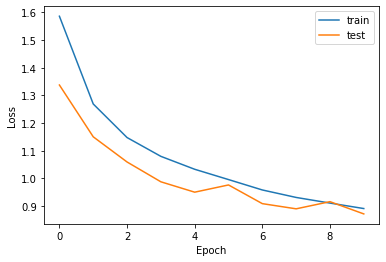

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch, loss, label='train')
plt.plot(epoch, val_loss, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()